In [37]:
import pyforest

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

In [38]:
#-- READING DATAFRAME FROM CSV FILE
data = pd.read_csv('googleplaystore.csv', encoding='latin-1')

In [39]:
#-- CHECK NUMBER OF ROWS AND COLUMNS (ROWS: NUMBER OF APPS)
data.shape

(10841, 13)

In [40]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [42]:
#-- CHECK FOR NUMBER OF NULL VALUES IN COLUMNS OF THE DATAFRAME
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [43]:
#-- DROP ALL NULL VALUES IN SPECIFIED COLUMNS
data.dropna(subset=['Rating'], inplace=True)
data.dropna(subset=['Content Rating'], inplace=True)
data.dropna(subset=['Current Ver'], inplace=True)
data.dropna(subset=['Android Ver'], inplace=True)

In [44]:
#-- PREVIOUS DROP CODE WAS SUCCESSFUL
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [46]:
data['Type'].value_counts()

Free    8715
Paid     645
Name: Type, dtype: int64

In [47]:
#--- CHANGE SOME COLUMNS WITH OBJECT DATATYPES TO INT, USING CAT.CODES

data['Category'] = data['Category'].astype('category')
data['Category'] = data['Category'].cat.codes

data['Type'] = data['Type'].astype('category')
data['Type'] = data['Type'].cat.codes

data['Content Rating'] = data['Content Rating'].astype('category')
data['Content Rating'] = data['Content Rating'].cat.codes

data['Genres'] = data['Genres'].astype('category')
data['Genres'] = data['Genres'].cat.codes

data['Size'] = data['Size'].astype('category')
data['Size'] = data['Size'].cat.codes

data['Android Ver'] = data['Android Ver'].astype('category')
data['Android Ver'] = data['Android Ver'].cat.codes

data['Installs'] = data['Installs'].astype('category')
data['Installs'] = data['Installs'].cat.codes

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null int8
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null int16
Installs          9360 non-null int8
Type              9360 non-null int8
Price             9360 non-null object
Content Rating    9360 non-null int8
Genres            9360 non-null int8
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null int8
dtypes: float64(1), int16(1), int8(6), object(5)
memory usage: 585.0+ KB


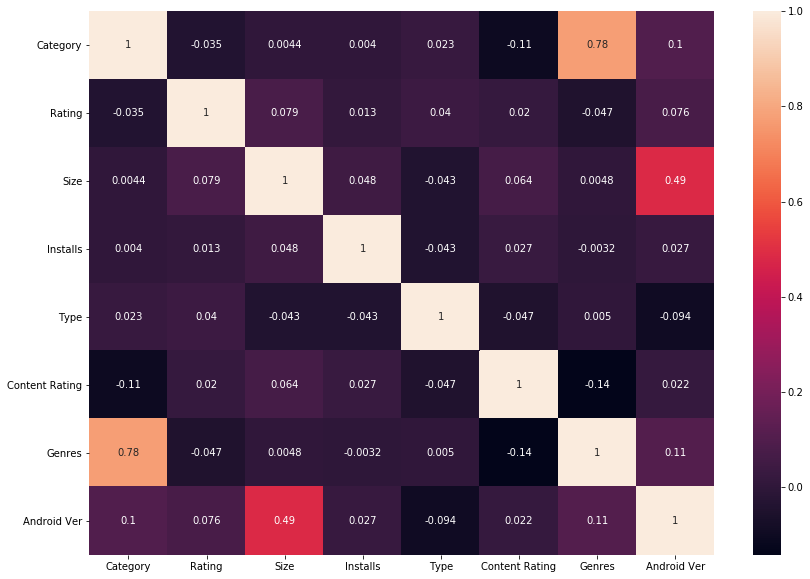

In [49]:
#-- HEATMAP
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=True)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null int8
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null int16
Installs          9360 non-null int8
Type              9360 non-null int8
Price             9360 non-null object
Content Rating    9360 non-null int8
Genres            9360 non-null int8
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null int8
dtypes: float64(1), int16(1), int8(6), object(5)
memory usage: 585.0+ KB


In [51]:
#--- CHANGE SOME COLUMNS WITH OBJECT DATATYPES TO FLOAT
data['Reviews'] = data['Reviews'].astype(float)
data['Price'] = data['Price'].str.strip('$')
data['Price'] = data['Price'].astype(float)

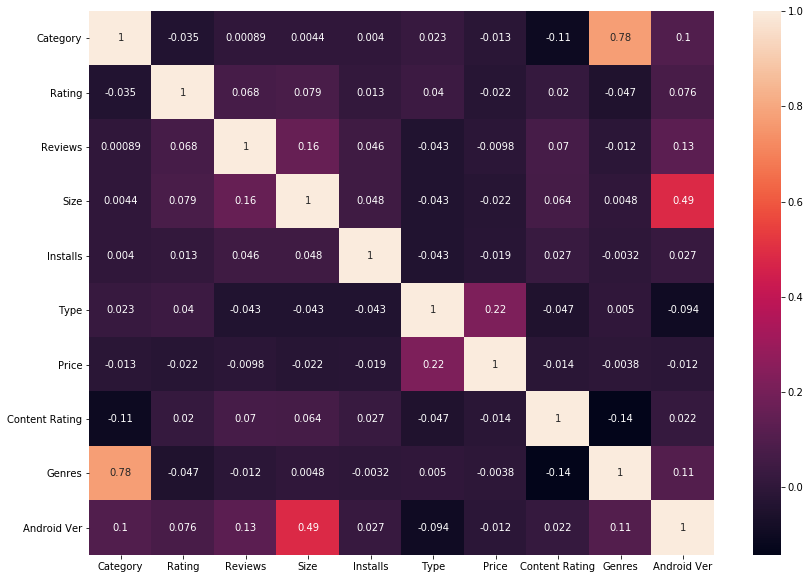

In [52]:
#-- HEATMAP
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=True)

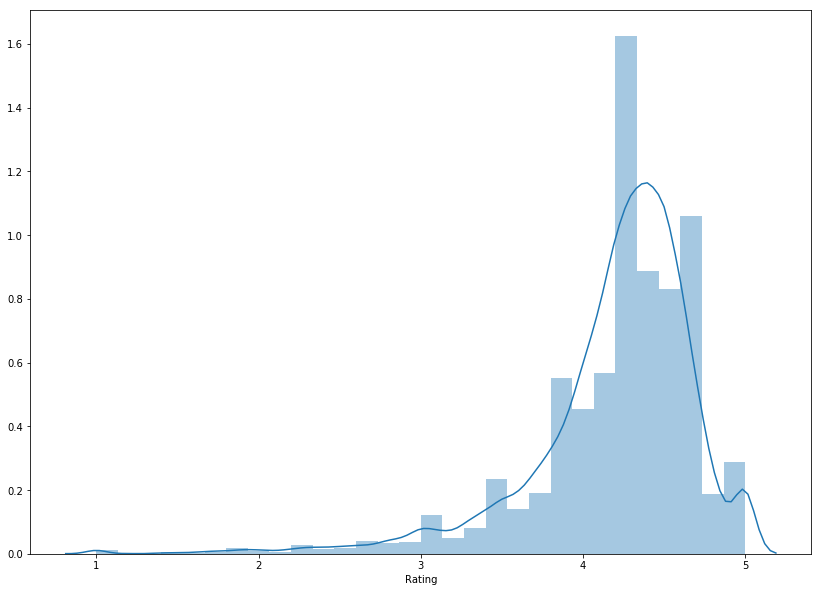

In [53]:
#-- HISTOGRAM
plt.figure(figsize=(14,10))
sns.distplot(data['Rating'], bins=30)

In [54]:
#--- USING LINEAR REGRESSION TO PREDICT THE RATINGS OF AN APP
linear_model = LinearRegression()

In [55]:
#-- DECLARING THE FEATURES AND LABEL FOR THE LR MODEL
features = data[['Category', 'Reviews', 'Size', 'Installs','Price', 'Content Rating', 'Type', 'Genres', 'Android Ver']]
label = data['Rating']

In [56]:
#-- SPLITTING LABEL AND FEATURES TO TRAIN AND TEST 
features_train, features_test, label_train, label_test = train_test_split(features,label,test_size=0.1)

In [57]:
#-- TRAINING THE MODEL
linear_model.fit(features_train, label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
#-- CHECKING FOR ERRORS USING THE MEAN SQ ERROR
err = mean_squared_error(label_test, linear_model.predict(features_test))

In [59]:
np.sqrt(err)

0.5337635867712224

In [60]:
#--- USING K-MEANS TO PREDICT WHETHER AN APP IS FREE OR PAID
#-- CHECKING THE CAT VALUES OF THE TYPE COLUMN

data['Type'].value_counts()
# Free    8715
# Paid     645

0    8715
1     645
Name: Type, dtype: int64

In [61]:
#-- RE-DEFINING THE TYPE VALUES IN A LIST
type_list = ['Free', 'Paid']

In [62]:
#-- DECLARING THE FEATURES AND LABEL FOR THE KMEANS MODEL
kfeatures = data[['Category', 'Reviews', 'Rating', 'Size', 'Installs', 'Content Rating', 'Genres', 'Android Ver']]
klabel = data['Type']

In [63]:
#-- DECLARING KMEANS VARIABLE
kmeans_model = KMeans(n_clusters=2)

In [72]:
#-- TRAINING THE MODEL
kmeans_model.fit(kfeatures)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [73]:
#-- CHECKING THE CLUSTERS
kmeans_model.cluster_centers_

array([[1.68000642e+01, 4.05895491e+05, 4.19149096e+00, 1.94140533e+02,
        7.58942524e+00, 1.48699561e+00, 6.22645831e+01, 1.65897463e+01],
       [1.64705882e+01, 6.01343756e+07, 4.38235294e+00, 4.11294118e+02,
        5.29411765e+00, 2.29411765e+00, 7.65294118e+01, 2.67058824e+01]])

In [74]:
#--- CLASSIFICATION REPORT
print(classification_report(klabel, kmeans_model.labels_))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8715
           1       0.00      0.00      0.00       645

   micro avg       0.93      0.93      0.93      9360
   macro avg       0.47      0.50      0.48      9360
weighted avg       0.87      0.93      0.90      9360



In [75]:
#--CONFUSION MATRIX
print(confusion_matrix(klabel, kmeans_model.labels_))

[[8698   17]
 [ 645    0]]


In [76]:
#-- CHECK PREDICTED LABELS
kmeans_model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159.0,47,5,0,0.0,1,9,7-Jan-18,1.0.0,14
1,Coloring book moana,0,3.9,967.0,24,17,0,0.0,1,11,15-Jan-18,2.0.0,14
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",0,4.7,87510.0,333,12,0,0.0,1,9,1-Aug-18,1.2.4,14
3,Sketch - Draw & Paint,0,4.5,215644.0,87,15,0,0.0,4,9,8-Jun-18,Varies with device,17
4,Pixel Draw - Number Art Coloring Book,0,4.3,967.0,56,8,0,0.0,1,10,20-Jun-18,1.1,19


In [78]:
test_data = pd.DataFrame({
    'Category':0, 
    'Reviews': 4938.0, 
    'Rating': 3.8, 
    'Size': 102, 
    'Installs': 14, 
    'Content Rating': 4, 
    'Genres': 10,
    'Android Ver': 7
}, index=[0])

In [79]:
type_list[kmeans_model.predict(test_data)[0]]

'Free'